**Data Preprocessing:**

*   Data preprocessing involving image cropping from PDFs and subsequent augmentation, conversion to grayscale, and standardizing to a 100x100 pixel JPG format involves several key steps:
*   **Image Cropping from PDFs:**
Using appropriate libraries like PyPDF2 or pdf2image in Python, you can extract images from PDF files. Cropping techniques or libraries like PyMuPDF can assist in isolating specific regions or images within the PDFs.

*   **Grayscale Conversion:**
After cropping and augmentation, converting images to grayscale is often beneficial for reducing computational complexity and focusing on essential features. This can be achieved through various libraries in Python like OpenCV or PIL.
*   **Standardizing to 100x100 Pixels:**
Resizing the images to a standard size of 100x100 pixels ensures uniformity and compatibility for further processing or training in machine learning models. Python libraries such as OpenCV or PIL provide resizing functionalities to accomplish this task.



In [1]:
# Load the data from pickle file
import pickle

with open('/content/drive/MyDrive/signatures 2.pkl', 'rb') as file:

    data = pickle.load(file)

print(type(data))

<class 'list'>


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers


images = np.array([d['data'] for d in data])  # Extracting features and labels
labels = np.array([d['target'] for d in data])


images = images / 255.0  # Normalize pixel values (assuming the images are grayscale)


image_size = int(np.sqrt(images.shape[1]))  # Reshape data for CNN input (assuming images are square)
images = images.reshape(-1, image_size, image_size, 1)  # Reshape to (num_samples, height, width, channels)

labels -= 1

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)  # Splitting the data into training and testing sets


model = Sequential()  # Creating the CNN model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(9, activation='softmax'))  # Assuming there are 9 classes


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model


history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))  # Train the model


test_loss, test_acc = model.evaluate(x_test, y_test)  # Evaluate the model
print(f"Test accuracy: {test_acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 113s 95ms/step - accuracy: 0.4723 - loss: 1.7121 - val_accuracy: 0.8055 - val_loss: 0.8377
Epoch 2/10
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 110s 92ms/step - accuracy: 0.7979 - loss: 0.8331 - val_accuracy: 0.8236 - val_loss: 0.7460
Epoch 3/10
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 110s 92ms/step - accuracy: 0.8334 - loss: 0.7255 - val_accuracy: 0.8504 - val_loss: 0.6487
Epoch 4/10
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 110s 93ms/step - accuracy: 0.8444 - loss: 0.6725 - val_accuracy: 0.8625 - val_loss: 0.6300
Epoch 5/10
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 109s 92ms/step - accuracy: 0.8650 - loss: 0.6207 - val_accuracy: 0.8673 - val_loss: 0.6153
Epoch 6/10
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 109s 92ms/step - accuracy: 0.8714 - loss: 0.6062 - val_accuracy: 0.8802 - val_loss: 0.5556
Epoch 7/10
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 109s 92ms/step - accuracy: 0.8842 - loss: 0.5517 - val_accuracy: 0.8982 - val_loss: 0.5283
Epoch 8/10
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 110s 93ms/step - accuracy: 

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,166,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,558,749 (25.02 MB)

 Trainable params: 2,186,249 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,372,500 (16.68 MB)

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_probabilities = model.predict(x_test)


y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convert probabilities to class labels


conf_matrix = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


class_report = classification_report(y_test, y_pred)  # Generate classification report
print("Classification Report:")
print(class_report)

297/297 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
Confusion Matrix:
[[1045   13    0    0    1    5    0    0    8]
 [   8  497    1    0   14   12    0    8   13]
 [   0    2 1051   36   23    0   19   92    1]
 [   1   10   20 1256   57    0    0   14    9]
 [   7   16    3   12 1079    0    0   39    6]
 [   2    4    0    0    0 1073    0    0    7]
 [   0    0   17    0    9    0  494   49    0]
 [   3   11    8    5   28    0   15 1138    8]
 [   8   16    0    3    2   92    0    8 1108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1072
           1       0.87      0.90      0.89       553
           2       0.96      0.86      0.90      1224
           3       0.96      0.92      0.94      1367
           4       0.89      0.93      0.91      1162
           5       0.91      0.99      0.95      1086
           6       0.94      0.87      0.90       569
           7       0.84      0.94      0.89      12

In [6]:
# Model saved:
model.save('cnn_01.h5')

In [ ]:
# test images:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('cnn_01.h5')  # Load the saved model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image: rotated_15_rotated_0_Page0_image6 3.jpg, Predicted class: 6


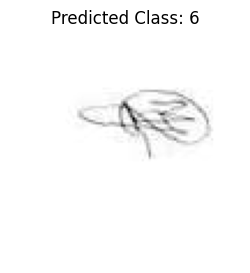

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: rotated_15_rotated_0_page_9_signature_4.jpg, Predicted class: 9


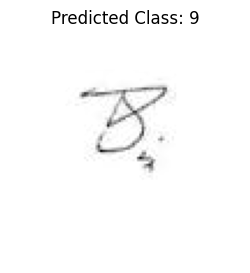

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: rotated_15_moved_-5_20.jpg, Predicted class: 7


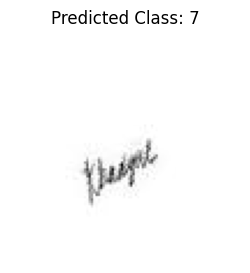

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: rotated_15_rotated_0_page_2_signature_6.jpg, Predicted class: 2


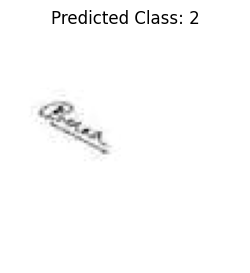

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: rotated_15_MicrosoftTeams-image.png, Predicted class: 4


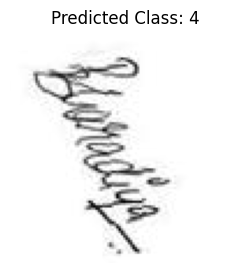

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Image: moved_12.jpg, Predicted class: 1


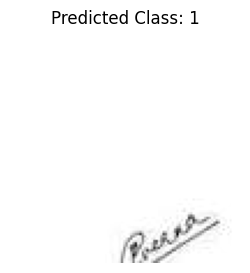

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: rotated_15_moved_20_-20.jpg, Predicted class: 6


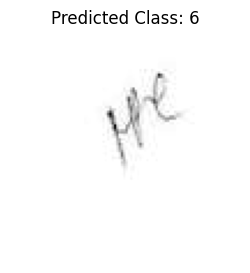

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: rotated_15_MicrosoftTeams-image.jpg, Predicted class: 4


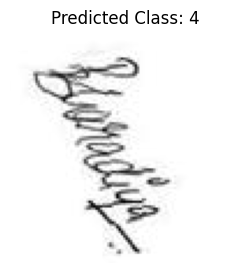

In [8]:
# Test images
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('cnn_01.h5')

# Directory containing test images
images_directory = '/content/drive/MyDrive/TestImages'

# Expected image size
image_size = 100

# Loop through all images in the directory
for filename in os.listdir(images_directory):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):  # Check if it's a JPG image
        image_path = os.path.join(images_directory, filename)
    else:
        # Convert non-JPG images to JPG format
        img = Image.open(os.path.join(images_directory, filename))
        image_path = os.path.join(images_directory, f"{os.path.splitext(filename)[0]}.jpg")
        img = img.convert('RGB')  # Convert to RGB
        img.save(image_path, format='JPEG')

    # Load and preprocess the image
    new_image = Image.open(image_path).convert('L')  # Convert to grayscale
    new_image_resized = new_image.resize((image_size, image_size))  # Resize the image
    new_image_array = np.array(new_image_resized)
    new_image_normalized = new_image_array / 255.0  # Normalize pixel values
    new_image_input = new_image_normalized.reshape(1, image_size, image_size, 1)  # Reshape for model input

    # Make predictions
    predictions = model.predict(new_image_input)
    predicted_class = np.argmax(predictions) + 1  # Get the predicted class (assuming labels start at 1)

    # Print predicted class
    print(f"Image: {filename}, Predicted class: {predicted_class}")

    # Visualize the image with its predicted class
    plt.figure(figsize = (3,3))
    plt.imshow(new_image, cmap='gray')  # Display the original grayscale image
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')  # Hide axis
    plt.show()